In [1]:
## Combined data then splitted

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import os
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator as IDG
from sklearn.model_selection import train_test_split
from keras import regularizers, optimizers
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint , LearningRateScheduler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve, auc,confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/all_data.zip

In [ ]:
!unzip /content/drive/MyDrive/all_data_class_combined.zip

In [6]:
img_path_all= '/content/all_data'

class_names = sorted(os.listdir(img_path_all))
class_names

['.DS_Store',
 'MildDemented',
 'ModerateDemented',
 'NonDemented',
 'VeryMildDemented']

In [7]:
df =pd.DataFrame(columns=("image","label"))
for i in class_names:
    if i != ".DS_Store":
        for j in os.listdir(img_path_all+ "/" + i):
            df.loc[len(df.index)] = [j,i]
df.to_csv("csv_file_all.csv")

In [8]:
df.head()

,image,label
0,mildDem151.jpg,MildDemented
1,mildDem694.jpg,MildDemented
2,32 (19).jpg,MildDemented
3,mildDem180.jpg,MildDemented
4,mildDem614.jpg,MildDemented


In [9]:
# Load the CSV files
df = pd.read_csv("csv_file_all.csv")

print(df['label'].value_counts())

NonDemented         3200
VeryMildDemented    2240
MildDemented         896
ModerateDemented      64
Name: label, dtype: int64


In [10]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [11]:
len(train_df), len(test_df) , len(val_df)

(4096, 1280, 1024)

In [12]:
train_gen = IDG(rescale=1/255, horizontal_flip=True, rotation_range=20)

train_images = train_gen.flow_from_dataframe(dataframe=train_df, directory='/content/all_data_class_combined/', x_col="image", y_col="label", class_mode="categorical", shuffle=True, batch_size=16, color_mode="grayscale", target_size=(176,176))
validation_images = train_gen.flow_from_dataframe(dataframe=val_df, directory='/content/all_data_class_combined/', x_col="image", y_col="label", class_mode="categorical", shuffle=True, batch_size=16, color_mode="grayscale", target_size=(176,176))
test_images = train_gen.flow_from_dataframe(dataframe=test_df, directory='/content/all_data_class_combined/', x_col="image", y_col="label", class_mode="categorical", shuffle=True, batch_size=16, color_mode="grayscale", target_size=(176,176))

Found 4096 validated image filenames belonging to 4 classes.
Found 1024 validated image filenames belonging to 4 classes.
Found 1280 validated image filenames belonging to 4 classes.


In [13]:
counter = Counter(train_images.classes)
counter_val = Counter(validation_images.classes)
counter_test = Counter(test_images.classes)
print(counter.items())
print(counter_val.items())
print(counter_test.items())

dict_items([(0, 557), (3, 1456), (2, 2033), (1, 50)])
dict_items([(3, 354), (2, 524), (0, 138), (1, 8)])
dict_items([(2, 643), (3, 430), (0, 201), (1, 6)])


In [15]:
class_counts = [557,50,2033 ,1456]

class_weights = compute_class_weight(class_weight = 'balanced', classes=np.unique(train_images.classes), y= train_images.classes)

class_weights_dict = dict(enumerate(class_weights))

In [16]:
class_weights_dict

{0: 1.8384201077199283, 1: 20.48, 2: 0.5036891293654697, 3: 0.7032967032967034}

In [ ]:
# model1

In [ ]:
model1 = models.Sequential()
model1.add(layers.Conv2D(128, (3, 3), padding='same', input_shape=(176, 176, 1)))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(layers.Dropout(0.3))
model1.add(layers.Activation("relu"))
model1.add(layers.Conv2D(64,(3, 3),  padding='same'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(layers.Dropout(0.3))
model1.add(layers.Activation("relu"))
model1.add(layers.Conv2D(32,(3, 3),  padding='same'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(layers.Dropout(0.3))
model1.add(layers.Activation("relu"))
model1.add(layers.Conv2D(16,(3, 3),  padding='same'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(layers.Dropout(0.3))
model1.add(layers.Activation("relu"))
model1.add(layers.Flatten())
model1.add(layers.Dense(512))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(4, activation='softmax'))
model1.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 176, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 88, 128)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 88, 88, 128)       512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 88, 88, 128)       0         
                                                                 
 activation (Activation)     (None, 88, 88, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 88, 88, 64)        7

In [ ]:
model1.load_weights('/content/shuffled_model1_1.h5')

In [ ]:
model_checkpoint = ModelCheckpoint('best_model_1.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy', mode='max', verbose=2)
history = model1.fit(train_images, validation_data=validation_images ,callbacks=[model_checkpoint], class_weight=class_weights_dict , epochs= 100)

Epoch 1/100
128/128 [==============================] - ETA: 0s - loss: 4.4604 - accuracy: 0.2930
Epoch 1: val_accuracy improved from -inf to 0.00781, saving model to best_model_1.h5
128/128 [==============================] - 33s 181ms/step - loss: 4.4604 - accuracy: 0.2930 - val_loss: 1.5304 - val_accuracy: 0.0078
Epoch 2/100
128/128 [==============================] - ETA: 0s - loss: 3.3104 - accuracy: 0.3069
Epoch 2: val_accuracy did not improve from 0.00781
128/128 [==============================] - 26s 200ms/step - loss: 3.3104 - accuracy: 0.3069 - val_loss: 1.5465 - val_accuracy: 0.0078
Epoch 3/100
128/128 [==============================] - ETA: 0s - loss: 2.2096 - accuracy: 0.3215
Epoch 3: val_accuracy improved from 0.00781 to 0.13477, saving model to best_model_1.h5
128/128 [==============================] - 24s 184ms/step - loss: 2.2096 - accuracy: 0.3215 - val_loss: 1.6099 - val_accuracy: 0.1348
Epoch 4/100
128/128 [==============================] - ETA: 0s - loss: 1.7169 - acc

In [ ]:
test_loss, test_accuracy = model1.evaluate(test_images) # 1st

40/40 [==============================] - 4s 102ms/step - loss: 0.8546 - accuracy: 0.5734


In [ ]:
model1.evaluate(train_images) , model1.evaluate(validation_images) #1st

32/32 [==============================] - 5s 153ms/step - loss: 0.8608 - accuracy: 0.5791


([0.8161712288856506, 0.604736328125], [0.8607696294784546, 0.5791015625])

40/40 [==============================] - 4s 109ms/step


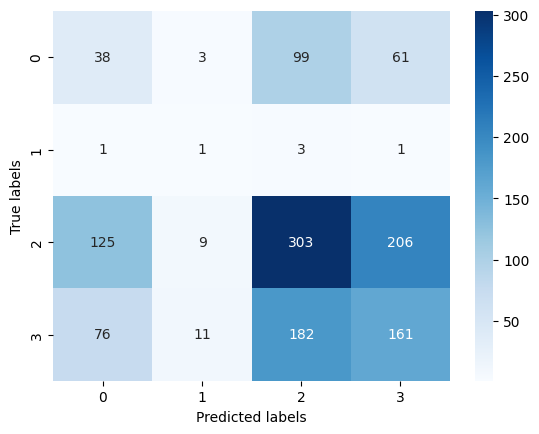

In [ ]:
true_test_labels = test_images.classes
test_pred = model1.predict(test_images)

test_pred_classes = np.argmax(test_pred, axis=1)
confusion_Matrix = confusion_matrix(true_test_labels, test_pred_classes)
sns.heatmap(confusion_Matrix, annot=True, cmap='Blues',fmt='.3g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
test_report = classification_report(true_test_labels, test_pred_classes)
print(test_report)

              precision    recall  f1-score   support

           0       0.16      0.19      0.17       201
           1       0.04      0.17      0.07         6
           2       0.52      0.47      0.49       643
           3       0.38      0.37      0.37       430

    accuracy                           0.39      1280
   macro avg       0.27      0.30      0.28      1280
weighted avg       0.41      0.39      0.40      1280



In [ ]:
# Model2 with slightly different order: dropout to 0.2 too much loss

In [17]:
model2 = models.Sequential()
model2.add(layers.Conv2D(128, (3, 3), padding='same', input_shape=(176, 176, 1)))
model2.add(BatchNormalization())
model2.add(layers.Activation("relu"))
model2.add(layers.Dropout(0.2))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(64,(3, 3),  padding='same'))
model2.add(BatchNormalization())
model2.add(layers.Activation("relu"))
model2.add(layers.Dropout(0.2))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(32,(3, 3),  padding='same'))
model2.add(BatchNormalization())
model2.add(layers.Activation("relu"))
model2.add(layers.Dropout(0.2))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(16,(3, 3),  padding='same'))
model2.add(BatchNormalization())
model2.add(layers.Activation("relu"))
model2.add(layers.Dropout(0.2))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(4, activation='softmax'))
model2.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [18]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 176, 128)     1280      
                                                                 
 batch_normalization (Batch  (None, 176, 176, 128)     512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 176, 176, 128)     0         
                                                                 
 dropout (Dropout)           (None, 176, 176, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 88, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 88, 88, 64)        7

In [20]:
model2.load_weights('/content/shuffled_model2_1.h5')

In [19]:
model_checkpoint = ModelCheckpoint('shuffled_model2_1.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy', mode='max', verbose=2)
history2 = model2.fit(train_images, validation_data=validation_images ,callbacks=[model_checkpoint], class_weight=class_weights_dict , epochs= 100)

Epoch 1/100
128/128 [==============================] - ETA: 0s - loss: 7.6886 - accuracy: 0.2986
Epoch 1: val_accuracy improved from -inf to 0.00781, saving model to shuffled_model2_1.h5
128/128 [==============================] - 47s 275ms/step - loss: 7.6886 - accuracy: 0.2986 - val_loss: 2.1067 - val_accuracy: 0.0078
Epoch 2/100
128/128 [==============================] - ETA: 0s - loss: 2.9924 - accuracy: 0.3467
Epoch 2: val_accuracy improved from 0.00781 to 0.34570, saving model to shuffled_model2_1.h5
128/128 [==============================] - 33s 261ms/step - loss: 2.9924 - accuracy: 0.3467 - val_loss: 1.5175 - val_accuracy: 0.3457
Epoch 3/100
128/128 [==============================] - ETA: 0s - loss: 2.7499 - accuracy: 0.3328
Epoch 3: val_accuracy improved from 0.34570 to 0.51172, saving model to shuffled_model2_1.h5
128/128 [==============================] - 34s 262ms/step - loss: 2.7499 - accuracy: 0.3328 - val_loss: 1.2444 - val_accuracy: 0.5117
Epoch 4/100
128/128 [==========

In [21]:
test_loss, test_accuracy = model2.evaluate(test_images) # 1st

40/40 [==============================] - 4s 97ms/step - loss: 0.9238 - accuracy: 0.5500


In [22]:
model2.evaluate(train_images) , model2.evaluate(validation_images) #1st

32/32 [==============================] - 3s 94ms/step - loss: 0.9137 - accuracy: 0.5713


([0.8947915434837341, 0.56591796875], [0.9136548042297363, 0.5712890625])

In [ ]:
true_test_labels = test_images.classes
test_pred = model3.predict(test_images)

test_pred_classes = np.argmax(test_pred, axis=1)
confusion_Matrix = confusion_matrix(true_test_labels, test_pred_classes)
sns.heatmap(confusion_Matrix, annot=True, cmap='Blues',fmt='.3g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
test_report = classification_report(true_test_labels, test_pred_classes)
print(test_report)

In [ ]:
# try changing the batch size and use smaller models

In [ ]:
# Model 3 vgg style multiple conv2d with activation

In [ ]:
model3 = models.Sequential()
model3.add(layers.Conv2D(128, (3, 3), padding='same', input_shape=(176, 176, 1)))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())
model3.add(layers.Dropout(0.3))
model3.add(layers.Activation("relu"))
model3.add(layers.Conv2D(64,(3, 3),  padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())
model3.add(layers.Dropout(0.3))
model3.add(layers.Activation("relu"))
model3.add(layers.Conv2D(32,(3, 3),  padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())
model3.add(layers.Dropout(0.3))
model3.add(layers.Activation("relu"))
model3.add(layers.Conv2D(16,(3, 3),  padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())
model3.add(layers.Dropout(0.3))
model3.add(layers.Activation("relu"))
model3.add(layers.Flatten())
model3.add(layers.Dense(512))
model3.add(layers.Dropout(0.3))
model3.add(layers.Dense(4, activation='softmax'))
model3.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model3.summary()

In [ ]:
model3.load_weights('/content/shuffled_model3_1.h5')

In [ ]:
model_checkpoint = ModelCheckpoint('shuffled_model3_1.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy', mode='max', verbose=2)
history3 = model3.fit(train_images, validation_data=validation_images ,callbacks=[model_checkpoint], class_weight=class_weights_dict , epochs= 100)

In [ ]:
test_loss, test_accuracy = model3.evaluate(test_images) # 1st

In [ ]:
model3.evaluate(train_images) , model3.evaluate(validation_images) #1st

In [ ]:
true_test_labels = test_images.classes
test_pred = model3.predict(test_images)

test_pred_classes = np.argmax(test_pred, axis=1)
confusion_Matrix = confusion_matrix(true_test_labels, test_pred_classes)
sns.heatmap(confusion_Matrix, annot=True, cmap='Blues',fmt='.3g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
test_report = classification_report(true_test_labels, test_pred_classes)
print(test_report)

In [ ]:
# Simple model-4 , with less layers

In [17]:
model4 = models.Sequential()
model4.add(layers.Conv2D(128, (3, 3), padding='same',activation ='relu', input_shape=(176, 176, 1)))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(BatchNormalization())
model4.add(layers.Dropout(0.2))
model4.add(layers.Conv2D(64,(3, 3),  padding='same',activation ='relu'))
model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(BatchNormalization())
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dropout(0.2))
model4.add(layers.Dense(256, activation= 'relu'))
model4.add(BatchNormalization())
model4.add(layers.Dropout(0.2))
model4.add(layers.Dense(4, activation='softmax'))
model4.compile(optimizer= optimizers.Adam(0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [18]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 176, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 88, 128)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 88, 88, 128)       512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 88, 88, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 88, 88, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 44, 44, 64)        0

In [43]:
model4.load_weights('/content/shuffled_model4_1-3.h5')

In [42]:
model_checkpoint = ModelCheckpoint('shuffled_model4_1-3.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy', mode='max', verbose=2)
history4 = model4.fit(train_images, validation_data=validation_images ,callbacks=[model_checkpoint] ,class_weight= class_weights_dict, epochs= 60)

Epoch 1/60
256/256 [==============================] - ETA: 0s - loss: 0.3331 - accuracy: 0.8096
Epoch 1: val_accuracy improved from -inf to 0.80078, saving model to shuffled_model4_1-3.h5
256/256 [==============================] - 29s 113ms/step - loss: 0.3331 - accuracy: 0.8096 - val_loss: 0.4674 - val_accuracy: 0.8008
Epoch 2/60
256/256 [==============================] - ETA: 0s - loss: 0.3232 - accuracy: 0.8052
Epoch 2: val_accuracy did not improve from 0.80078
256/256 [==============================] - 28s 110ms/step - loss: 0.3232 - accuracy: 0.8052 - val_loss: 0.6544 - val_accuracy: 0.7188
Epoch 3/60
256/256 [==============================] - ETA: 0s - loss: 0.3121 - accuracy: 0.8103
Epoch 3: val_accuracy did not improve from 0.80078
256/256 [==============================] - 28s 110ms/step - loss: 0.3121 - accuracy: 0.8103 - val_loss: 0.6881 - val_accuracy: 0.7100
Epoch 4/60
256/256 [==============================] - ETA: 0s - loss: 0.3125 - accuracy: 0.8171
Epoch 4: val_accurac

In [44]:
model4.evaluate(test_images)

80/80 [==============================] - 6s 75ms/step - loss: 0.4604 - accuracy: 0.8070


[0.46044039726257324, 0.8070312738418579]

In [45]:
model4.evaluate(train_images) , model4.evaluate(validation_images)

64/64 [==============================] - 3s 49ms/step - loss: 0.3977 - accuracy: 0.8340


([0.23701004683971405, 0.89697265625], [0.3976980447769165, 0.833984375])

80/80 [==============================] - 4s 46ms/step


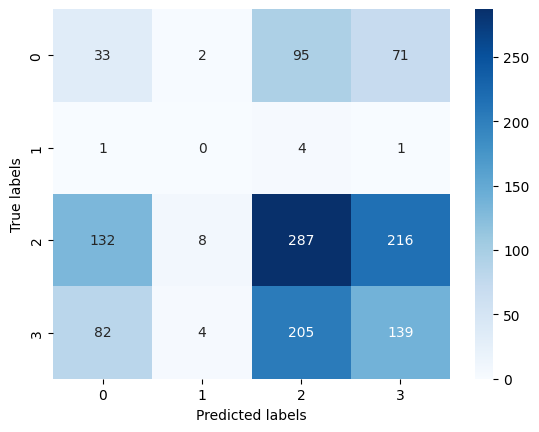

In [46]:
true_test_labels = test_images.classes
test_pred = model4.predict(test_images)

test_pred_classes = np.argmax(test_pred, axis=1)
confusion_Matrix = confusion_matrix(true_test_labels, test_pred_classes)
sns.heatmap(confusion_Matrix, annot=True, cmap='Blues',fmt='.3g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [48]:
test_report = classification_report(true_test_labels, test_pred_classes)
print(test_report)

              precision    recall  f1-score   support

           0       0.13      0.16      0.15       201
           1       0.00      0.00      0.00         6
           2       0.49      0.45      0.47       643
           3       0.33      0.32      0.32       430

    accuracy                           0.36      1280
   macro avg       0.24      0.23      0.23      1280
weighted avg       0.37      0.36      0.37      1280

